In [ ]:
import pandas as pd


Online Repo - News Articles - https://archive.ics.uci.edu/dataset/359/news+aggregator

In [ ]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from flask import Flask, render_template, request



In [ ]:
!pip install nbconvert

In [ ]:
import nbconvert

In [ ]:
app = Flask(__name__)

# Define the websites to scrape news from
news_websites = [
    'https://www.bbc.com',
    'https://www.cnn.com'
]

In [ ]:

# Function to scrape news articles
def scrape_news(websites):
    news_data = []

    for website in websites:
        response = requests.get(website)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract news articles and their content
        articles = soup.find_all('article')  # Adjust this based on the HTML structure
        for article in articles:
            title = article.find('h2').text
            content = article.find('p').text
            sentiment = analyze_sentiment(content)

            news_data.append({'title': title, 'content': content, 'sentiment': sentiment})

    return news_data

# Function to analyze sentiment of news content
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity

    if sentiment_score > 0.3:
        return 'Good'
    elif sentiment_score < -0.3:
        return 'Sad'
    else:
        return 'Neutral'

@app.route('/')
def index():
    news_data = scrape_news(news_websites)
    return render_template('index.html', news_data=news_data)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


### Experiment - WordCloud

In [ ]:
!pip install wordcloud

### Part 1 -

 https://archive.ics.uci.edu/ml/machine-learning-databases/00380/

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.CONTENT:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
import scipy.stats as stats
import numpy as np

# scores of two groups (0 and 1) of students
scores = np.array([[49, 0],[53, 1],[56, 1],[43, 1],[45, 1],[53, 1],[45, 1],[56, 1],[51, 0],[43, 0],[47, 1],[44, 0],[51, 0],[53, 1],[50, 0],[54, 0],[51, 0],[51, 1],[46, 0],[47, 1]])

# Separating the data into 2 groups

group1 = scores[scores[:, 1] == 0] # elements of the array where group == 0
group1 = group1[:, 0] # scores of group 0 students
group2 = scores[scores[:, 1] == 1] # elements of the array where group == 1
group2 = group2[:, 0] # scores of group 1 students

#applying t-test to check if the scores of group 0 and group 1 students are indeed different
stats.ttest_ind(group1, group2, equal_var = False)


TtestResult(statistic=-0.607694899652158, pvalue=0.5509860214402561, df=17.98688825272457)

## Extracting News Article from the BBC

In [ ]:
import requests
from bs4 import BeautifulSoup


def get_links():
    LINKS = []
    url = 'https://www.bbc.com'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, features='lxml')
    for html in soup.find_all('li', class_='media-list__item'):
        link = html.find('a').get('href')
        if "https://" in link:
            LINKS.append(link)
        else:
            link = url + link
            LINKS.append(link)
    return LINKS


def get_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, features='lxml')
    heading = soup.find('h1', {"id": "main-heading"}).getText()
    print(heading)
    for block in soup.find_all('div', {"data-component": "text-block"}):
        print(block.getText())

for link in get_links():
    if "/news/" in link:
        get_page(link)

AttributeError: ignored

In [ ]:
!pip install news-fetch

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.4/286.4 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.0/415.0 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 40.0 MB/s eta 0

## Using News API

In [ ]:
!pip install pywin32

ERROR: Could not find a version that satisfies the requirement pywin32 (from versions: none)
ERROR: No matching distribution found for pywin32


In [ ]:
# importing requests package
import requests

def NewsFromBBC():

	# BBC news api
	# following query parameters are used
	# source, sortBy and apiKey
	query_params = {
	"source": "bbc-news",
	"sortBy": "top",
	#"apiKey": "4dbc17e007ab436fb66416009dfb59a8"
  "apiKey": "e7a28541b2574b2096f501f9d03ebabf"
	}
	main_url = " https://newsapi.org/v1/articles"

	# fetching data in json format
	res = requests.get(main_url, params=query_params)
	open_bbc_page = res.json()

	# getting all articles in a string article
	article = open_bbc_page["articles"]

	# empty list which will
	# contain all trending news
	results = []

	for ar in article:
		results.append(ar["title"])
    #text.append(ar["article"])

	for i in range(len(results)):

		# printing all trending news
		print(i + 1, results[i])
    #print(i+)

# Driver Code
if __name__ == '__main__':

	# function call
	NewsFromBBC()


1 Israeli forces fight to drive out Hamas militants and free hostages
2 Biden cannot escape Trump's shadow in border crisis
3 Destroyed cars line road near festival in chilling video
4 Nevada lithium mine leads to 'green colonialism' accusations
5 Joe Biden sends military aid to Israel after Hamas attack
6 Afghanistan earthquake: Race to rescue victims in Herat Province
7 Two Israeli tourists and local guide shot dead in Egypt, Israel says
8 Terence Davies: Screenwriter and film director dies aged 77
9 Antigua and Barbuda's youth orchestra plays to inspire
10 Biles becomes most decorated gymnast in history


In [ ]:
import pprint
import requests


secret = "e7a28541b2574b2096f501f9d03ebabf"

# Define the endpoint
url = 'https://newsapi.org/v2/everything?'

# Specify the query and
# number of returns
parameters = {
	'q': 'nigeria', # query phrase
	'pageSize': 100, # maximum is 100
	'apiKey': secret # your own API key
}

# Make the request
response = requests.get(url,
						params = parameters)

# Convert the response to
# JSON format and pretty print it
response_json = response.json()
pprint.pprint(response_json)


{'articles': [{'author': None,
               'content': 'Migrants from Syria, Nigeria, Bangladesh, Pakistan '
                          'and Egypt danced after being rescued off the coast '
                          'of Libya. \r\n'
                          'The 61 male migrants celebrated with volunteers '
                          'from Médecins Sans Frontières after b… [+105 chars]',
               'description': 'Male migrants from Syria, Nigeria, Bangladesh, '
                              'Pakistan and Egypt danced after being rescued '
                              'off the coast of Libya.',
               'publishedAt': '2023-09-30T04:01:47Z',
               'source': {'id': 'bbc-news', 'name': 'BBC News'},
               'title': 'Migrants celebrate and dance after being rescued',
               'url': 'https://www.bbc.co.uk/news/av/world-africa-66967933',
               'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/19F9/production/_131294660_p0ghlg4m.jpg'},

Let’s combine all texts and sort the words from the greatest number to lower.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text_combined = ''

for i in response_json['articles']:

	if i['description'] != None:
		text_combined += i['description'] + ' '

wordcount={}
for word in text_combined.split():
	if word not in wordcount:
		wordcount[word] = 1
	else:
		wordcount[word] += 1

for k,v, in sorted(wordcount.items(),
				key=lambda words: words[1],
				reverse = True):
	print(k,v)


the 102
a 59
of 52
in 52
to 42
and 41
for 23
The 23
Nigeria 22
is 20
has 20
with 18
that 16
on 14
at 11
de 11
from 10
after 10
have 10
an 10
was 10
people 9
la 9
by 8
as 8
will 8
Nigeria, 7
one 7
die 7
first 7
its 7
who 6
President 6
der 6
[Premium 6
Times] 6
African 5
two 5
this 5
global 5
they 5
- 5
I 5
Nigerians 5
Bola 5
Tinubu 5
be 5
World 5
… 5
sich 5
A 4
more 4
other 4
not 4
Nigeria. 4
which 4
New 4
behind 4
say 4
In 4
es 4
years 4
all 4
three 4
new 4
it 4
un 4
esta 4
their 4
le 4
15 4
WHO 4
Jahr 4
were 3
are 3
some 3
British 3
U.S. 3
over 3
Nigerian 3
than 3
into 3
game 3
companies 3
since 3
hat 3
his 3
support 3
South 3
Africa's 3
help 3
make 3
world 3
through 3
Phantom 3
countries 3
So 3
about 3
Saudi 3
been 3
top 3
20 3
que 3
supports 3
e 3
ein 3
your 3
Zahl 3
Netflix 3
children 3
says 3
leave 3
plus 3
more. 3
[Leadership] 3
had 3
Pro 3
Max 3
now 3
role 3
would 3
financial 3
2021 3
migrants 2
Bangladesh, 2
off 2
team 2
genetic 2
much 2
recent 2
United 2
— 2
Africa 2
regions 2

This evaluation is ambiguous, we can make it more clear if we delete bad or useless words. Let’s define some of bad_words shown below

In [ ]:
# initializing bad_chars_list
bad_words = ["a", "the" , "of", "in", "to", "and", "on", "de", "with",
			"by", "at", "dans", "ont", "été", "les", "des", "au", "et",
			"après", "avec", "qui", "par", "leurs", "ils", "a", "pour",
			"les", "on", "as", "france", "eux", "où", "son", "le", "la",
			"en", "with", "is", "has", "for", "that", "an", "but", "be",
			"are", "du", "it", "à", "had", "ist", "Der", "um", "zu", "den",
			"der", "-", "und", "für", "Die", "von", "als",
			"sich", "nicht", "nach", "auch" ]


r = text_combined.replace('\s+',
						' ').replace(',',
									' ').replace('.',
													' ')
words = r.split()
rst = [word for word in words if
	( word.lower() not in bad_words
		and len(word) > 3) ]

rst = ' '.join(rst)

wordcount={}

for word in rst.split():

	if word not in wordcount:
		wordcount[word] = 1
	else:
		wordcount[word] += 1

for k,v, in sorted(wordcount.items(),
				key=lambda words: words[1],
				reverse = True):
	print(k,v)


Nigeria 33
people 12
from 10
after 10
have 10
more 9
will 8
first 7
Nigerians 6
President 6
[Premium 6
Times] 6
African 5
this 5
global 5
they 5
years 5
Bola 5
Tinubu 5
World 5
other 4
which 4
behind 4
Read 4
three 4
economy 4
esta 4
their 4
role 4
Jahr 4
were 3
United 3
some 3
British 3
India 3
star 3
over 3
death 3
Nigerian 3
than 3
year 3
into 3
London 3
game 3
companies 3
since 3
2022 3
support 3
South 3
Africa's 3
help 3
make 3
world 3
through 3
Phantom 3
countries 3
talks 3
about 3
2023 3
Saudi 3
been 3
supports 3
your 3
Zahl 3
Netflix 3
children 3
Portugal 3
says 3
leave 3
plus 3
[Leadership] 3
would 3
financial 3
2021 3
said 3
migrants 2
Bangladesh 2
team 2
genetic 2
much 2
recent 2
Kenya 2
Africa 2
regions 2
neglected 2
cities 2
while 2
Marley 2
Afrobeats 2
died 2
Lagos 2
last 2
month 2
mysterious 2
More 2
#WeArePlay 2
stories 2
Singapore 2
Chile 2
Meet 2
inspiring 2
Google 2
Play 2
deadly 2
killed 2
immer 2
wollen 2
data 2
rose 2
increase 2
legal 2
access 2
movement 2
boat 2


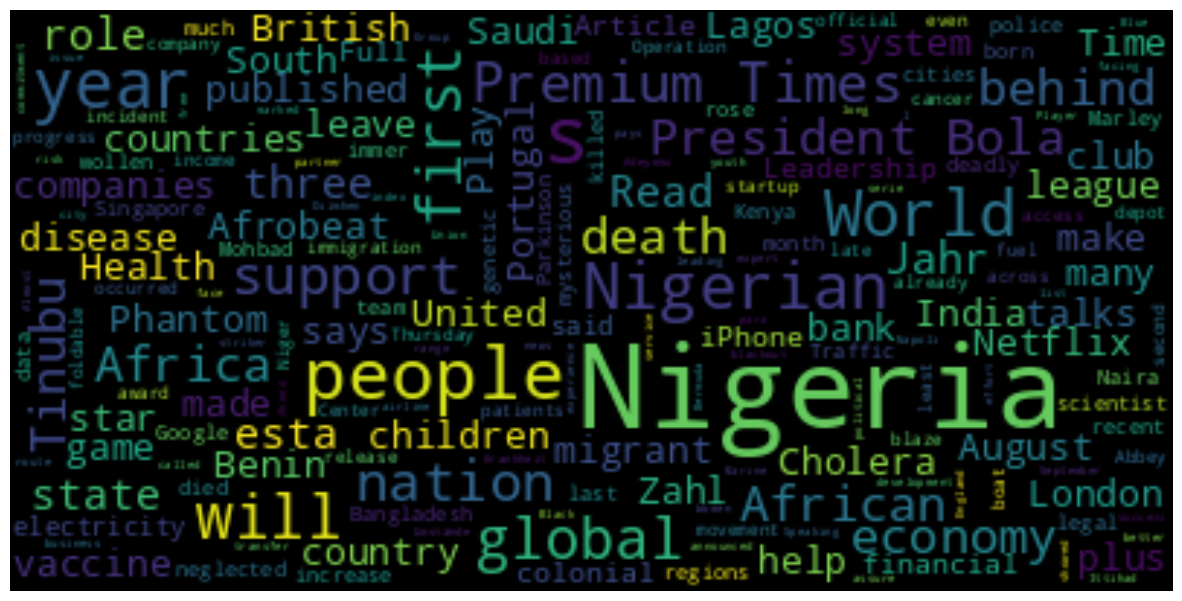

In [ ]:
word = WordCloud(max_font_size = 40).generate(rst)
plt.figure(figsize=(15, 8))
plt.imshow(word, interpolation ="bilinear")
plt.axis("off")
plt.show()

Doing thesame with just titles alone

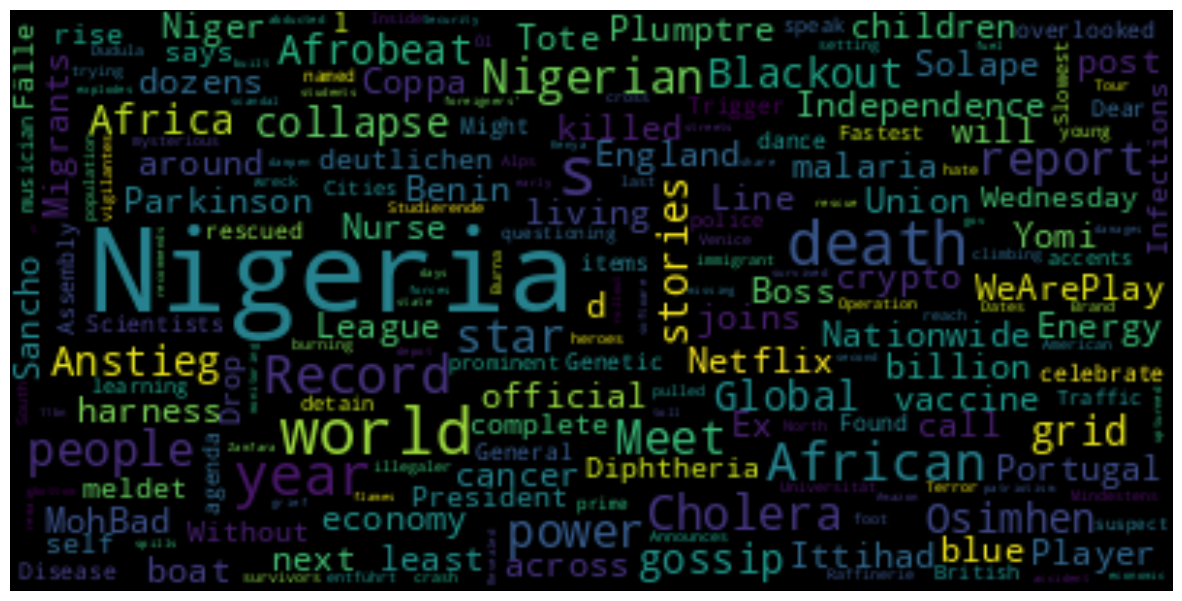

In [ ]:
title_combined = ''

for i in response_json['articles']:
	title_combined += i['title'] + ' '

titles = title_combined.replace('\s+',
								' ').replace(',',
											' ').replace('.',
														' ')
words_t = titles.split()
result = [word for word in words_t if
		( word.lower() not in bad_words and
		len(word) > 3) ]

result = ' '.join(result)

wordcount={}

for word in result.split():

	if word not in wordcount:
		wordcount[word] = 1
	else:
		wordcount[word] += 1

word = WordCloud(max_font_size=40).generate(result)
plt.figure(figsize=(15, 8))
plt.imshow(word, interpolation="bilinear")
plt.axis("off")
plt.show()


Likk: For morehttps://www.geeksforgeeks.org/newspaper-scraping-using-python-and-news-api/

## Route 2 -

In [ ]:
import newspaper
import feedparser


def scrape_news_from_feed(feed_url):
	articles = []
	feed = feedparser.parse(feed_url)
	for entry in feed.entries:
		# create a newspaper article object
		article = newspaper.Article(entry.link)
		# download and parse the article
		article.download()
		article.parse()
		# extract relevant information
		articles.append({
			'title': article.title,
			'author': article.authors,
			'publish_date': article.publish_date,
			'content': article.text
		})
	return articles


feed_url = 'http://feeds.bbci.co.uk/news/rss.xml'
articles = scrape_news_from_feed(feed_url)

# print the extracted articles
for article in articles:
	print('Title:', article['title'])
	print('Author:', article['author'])
	print('Publish Date:', article['publish_date'])
	print('Content:', article['content'])
	print()


Title: Israel-Gaza attacks: More than 10 Britons feared dead or missing
Author: []
Publish Date: None
Content: The authorities had asked that no more than 50 people attend the open-air service - so that, like other public gatherings, it could not be a target. In the end more than 1,000 turned out - and listened as Mr Young's brother Elliot pay tribute to him.

Title: Hamas Israel attacks: Humza Yousaf's in-laws trapped in Gaza
Author: []
Publish Date: None
Content: The First Minister said he believed a two-state solution in Israel was the only way to stop the cycle of violence in Israel and Palestine. He said the Scottish government would not fly Israeli or Palestinian flags from its buildings, but would focus on how it could ensure the safety of any Scots in Israel or Gaza.

Title: Labour plans to fight next election on economy
Author: []
Publish Date: None
Content: She said that "taxpayers' money should be spent with the same care with which we spend our own money" but that under the

In [ ]:
!pip3 install newspaper3k

In [ ]:
from newspaper import Article

#A new article from TOI
#url = "http:// timesofindia.indiatimes.com/world/china/chinese-expert-warns-of-troops-entering-kashmir/articleshow/59516912.cms"
url = "https://www.gazzetta.it/Calcio/Serie-A/Napoli/29-09-2023/caso-osimhen-interviene-anche-il-ministro-nigeriano-siamo-pronti-ad-approfondire.shtml"

#For different language newspaper refer above table
toi_article = Article(url, language="en") # en for English

#To download the article
toi_article.download()

#To parse the article
toi_article.parse()

#To perform natural language processing ie..nlp
toi_article.nlp()

#To extract title
print("Article's Title:")
print(toi_article.title)
print("n")

#To extract text
print("Article's Text:")
print(toi_article.text)
print("n")

#To extract summary
print("Article's Summary:")
print(toi_article.summary)
print("n")

#To extract keywords
print("Article's Keywords:")
print(toi_article.keywords)


LookupError: ignored

In [ ]:
!pip install pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 17.9 MB/s eta 0:00:00


In [ ]:
!pip install pyshorteners

  Preparing metadata (setup.py) ... done
  Created wheel for pyshorteners: filename=pyshorteners-1.0.1-py3-none-any.whl size=17481 sha256=6e7ed55be3c7773acc5383d80824ab23d0c32b3f206f75c863df6fcf21abf535
  Stored in directory: /root/.cache/pip/wheels/d5/ff/b3/16d8906f92ab0b042f76a4696fcea11d291d79a2b3a3de1e78
Successfully built pyshorteners


In [ ]:
# Python program to get top 3 trendy news item


import tweepy
import json
from datetime import date, timedelta, datetime
from pymongo import MongoClient
from html.parser import HTMLParser
import re
from pyshorteners import Shortener


NewsArrayIndex = 0
NewsArray = [None] * 3

class MyHTMLParser(HTMLParser):

	# This function collects the value
	# of href and stores in NewsArrayIndex
	# variable
	def handle_starttag(self, tag, attrs):

		# Only parse the 'anchor' tag.
		global NewsArrayIndex
		if tag == "a":

			# Check the list of defined attributes.
			for name, value in attrs:

				# If href is defined, print it.
				if name == "href":

					# print(value + "\t" + News1)
					NewsArray[NewsArrayIndex] = value

					# print(NewsArray)
					NewsArrayIndex += 1

# This function is the primary place
# to tweet the collected daily news
# News is retrieved from Coll_DailyNewsPlusReview
# collection (MongoDB collection) This collection
# holds the value of " News Headlines, Its review
# count, news link" and based upon the review count,
# top most # reviewed news are taken As twitter allows
# only 280 characters, the retrieved news link got
# shortened by using BITLY API Hashtags related to
# the news are added underneath the retrieved top
# 3 news (All together allowed characters are 280)
# Then top 3 news gets tweeted from a credential
# Finally per day basis the tweeted news are stored
# into another collection for audit purposes as well
# as for weekly posting
def tweetDailyNews():

	try:

		# This is the collection name in mongodb
		cursor_P = db1.Coll_DailyNewsPlusReview.find({"time": date_str})

		p0 = cursor_P[0]
		News = p0.get('News')
		sortedNews = sorted(News, key = lambda x: int(x[1]), reverse = True)
		print(sortedNews[0][0]+"--" + sortedNews[0][1],
			sortedNews[1][0] + ".."+ sortedNews[1][1],
			sortedNews[2][0] + ".." + sortedNews[2][1])

		hyperlink_format = '<a href ="{link}">{text}</a>'
		parser = MyHTMLParser()
		dailyNews = "Impactful News of the Day" + "\n"

		News0 = sortedNews[0][2]
		parser.feed(hyperlink_format.format(link = News0, text = News0))

		News1 = sortedNews[1][2]
		print("News1", News1)
		parser.feed(hyperlink_format.format(link = News1, text = News1))

		News2 = sortedNews[2][2]
		print(News2)
		parser.feed(hyperlink_format.format(link = News2, text = News2))

		# News shortening pattern
		BITLY_ACCESS_TOKEN ="20dab258cc44c7d017bcd1c1f4b24484a37b8de9"
		b = Shortener(api_key = ACCESS_TOKEN)

		NewsArray[0] = re.sub('\n', '', NewsArray[0])
		response1 = b.bitly.short(NewsArray[0])
		response1 = response1['url']

		NewsArray[1] = re.sub('\n', '', NewsArray[1])
		response2 = b.bitly.short(NewsArray[1])
		response2 = response2['url']

		NewsArray[2] = re.sub('\n', '', NewsArray[2])
		response3 = b.bitly.short(NewsArray[2])
		response3 = response3['url']

		news1FewWords = sortedNews[0][0].split()
		dailyNews += news1FewWords[0] + " "
		+ news1FewWords[1] + " " + news1FewWords[2]
		+ "...." + response1 + "\n"

		news2FewWords = sortedNews[1][0].split()
		dailyNews += news2FewWords[0] + " "
		+ news2FewWords[1] + " " + news2FewWords[2]
		+ "...." + response2+"\n"

		news3FewWords = sortedNews[2][0].split()
		dailyNews += news3FewWords[0] + " "
		+ news3FewWords[1] + " " + news3FewWords[2]
		+ "...." + response3 + "\n" + "# bitcoin \ "
		+"# cryptocurrency # blockchain # investor # altcoins\ "
		+"# fintech # investment"
		print(dailyNews)

		status = api.update_status(status = dailyNews)
		if status:
			for i in range(3):
				datas = {}
				datas['time'] = str(date.today())
				datas['posted_as'] = i
				datas['news'] = sortedNews[i][0]
				datas['shortenedlink'] = NewsArray[i]
				datas['reviewcount'] = sortedNews[i][1]
				datas['link'] = sortedNews[i][2]
				db1.Collection_tweeted_news.insert(datas)


	except Exception as e:
		print(e)
		print("Error in getting today news data", str(date_str))


# Driver Code
News1 = ' '
News2 = ' '

date_str = str(date.today())
print("today", date_str)
client = MongoClient('mongodb://localhost:27017/')

# Connect your database here
db1 = client.xxxx

# credentials to tweet
consumer_key ="xxxx"
consumer_secret ="xxxx"
access_token ="xxxx"
access_token_secret ="xxxx"

# authentication of consumer key and secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# authentication of access token and secret
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,
				wait_on_rate_limit = True,
				wait_on_rate_limit_notify = True)

tweetDailyNews()


today 2023-10-09


TypeError: ignored

More

In [ ]:
!pip install gnewsclient

In [ ]:
import gnewsclient
from gnewsclient import gnewsclient

client = gnewsclient.NewsClient(language='english',
								location='Nigeria',
								topic='Tinubu',
								max_results=5)

# prints location
print("Location: \n",client.locations)
print()

# prints languages
print("Language \n",client.languages)
print()

# prints topics
print("Topic \n",client.topics)


Location: 
 ['Australia', 'Botswana', 'Canada ', 'Ethiopia', 'Ghana', 'India ', 'Indonesia', 'Ireland', 'Israel ', 'Kenya', 'Latvia', 'Malaysia', 'Namibia', 'New Zealand', 'Nigeria', 'Pakistan', 'Philippines', 'Singapore', 'South Africa', 'Tanzania', 'Uganda', 'United Kingdom', 'United States', 'Zimbabwe', 'Czech Republic', 'Germany', 'Austria', 'Switzerland', 'Argentina', 'Chile', 'Colombia', 'Cuba', 'Mexico', 'Peru', 'Venezuela', 'Belgium ', 'France', 'Morocco', 'Senegal', 'Italy', 'Lithuania', 'Hungary', 'Netherlands', 'Norway', 'Poland', 'Brazil', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Sweden', 'Vietnam', 'Turkey', 'Greece', 'Bulgaria', 'Russia', 'Ukraine ', 'Serbia', 'United Arab Emirates', 'Saudi Arabia', 'Lebanon', 'Egypt', 'Bangladesh', 'Thailand', 'China', 'Taiwan', 'Hong Kong', 'Japan', 'Republic of Korea']

Language 
 ['english', 'indonesian', 'czech', 'german', 'spanish', 'french', 'italian', 'latvian', 'lithuanian', 'hungarian', 'dutch', 'norwegian', 'polish', 'po

In [ ]:
# import modules
from tkinter import *
from gnewsclient import gnewsclient

# defined functions
def news():
	client = gnewsclient.NewsClient(
		language=lang.get(), location=loc.get(), topic=top.get(), max_results=3)
	news_list = client.get_news()
	result_title.set(news_list[0]["title"] + "\n" +
					news_list[1]["title"] + "\n" + news_list[2]["title"])


# tkinter object
master = Tk()
master.title("NEWS")

# background set to grey
master.configure(bg='light grey')

# Variable Classes in tkinter
result_title = StringVar()
result_link = StringVar()

# Creating label for each information
# name using widget Label
Label(master, text="Choose language :", bg="light grey").grid(row=0, sticky=W)
Label(master, text="Choose Location :", bg="light grey").grid(row=1, sticky=W)
Label(master, text="Choose Topic :", bg="light grey").grid(row=2, sticky=W)


lang = Entry(master)
lang.grid(row=0, column=1)

loc = Entry(master)
loc.grid(row=1, column=1)

top = Entry(master)
top.grid(row=2, column=1)


# Creating label for class variable
# name using widget Entry
Label(master, text="", textvariable=result_title,
	bg="light grey").grid(row=3, column=1, sticky=W)

# creating a button using the widget
# Button to call the submit function
Button(master, text="SHOW", command=news, bg="white").grid(row=1, column=3)


mainloop()


TclError: ignored

## Using FeedParser

In [ ]:
!pip install feedparser

In [ ]:
import feedparser

url = "https://www.example.com/rss"
feed = feedparser.parse(url)

print(feed)

# The feed object contains metadata about the RSS feed, such as the feed title, description, and link. You can access these properties using the feed.feed attribute:

print("Feed Title:", feed.feed.title)
print("Feed Description:", feed.feed.description)
print("Feed Link:", feed.feed.link)

In [ ]:
#The feed object also contains a list of entries or items in the RSS feed. You can access and iterate through these entries using the feed.entries attribute:
for entry in feed.entries:
    print("Entry Title:", entry.title)
    print("Entry Link:", entry.link)
    print("Entry Published Date:", entry.published)
    print("Entry Summary:", entry.summary)
    print("\n")

In [ ]:
# fetch entries published within a specific time range. You can do this by comparing the published date of each entry with your desired time range:
from datetime import datetime, timedelta

# Define the time range (e.g., the last 24 hours)
now = datetime.now()
time_range = timedelta(days=1)
# Iterate through entries and filter by the time range
for entry in feed.entries:
    entry_date = datetime.strptime(entry.published, "%a, %d %b %Y %H:%M:%S %z")
    if now - entry_date <= time_range:
        print("Entry Title:", entry.title)
        print("Entry Link:", entry.link)
        print("Entry Published Date:", entry.published)
        print("Entry Summary:", entry.summary)
        print("\n")

In [ ]:
# Storing Feed Data in a CSV File

import csv

# Prepare the CSV file
with open('rss_data.csv', mode='w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['title', 'link', 'published', 'summary']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    # Iterate through entries and write to the CSV file
    for entry in feed.entries:
        writer.writerow({'title': entry.title, 'link': entry.link, 'published': entry.published, 'summary': entry.summary})

In [ ]:
# Monitoring Multiple Feeds

def fetch_rss_data(url):
    feed = feedparser.parse(url)
    print("Feed Title:", feed.feed.title)
    for entry in feed.entries:
        print("Entry Title:", entry.title)
        print("Entry Link:", entry.link)
        print("Entry Published Date:", entry.published)
        print("Entry Summary:", entry.summary)
        print("\n")
# List of RSS feed URLs
rss_feed_urls = [
    "https://www.example1.com/rss",
    "https://www.example2.com/rss",
    "https://www.example3.com/rss"
]
# Fetch data from multiple RSS feeds
for url in rss_feed_urls:
    fetch_rss_data(url)

Links - https://www.geeksforgeeks.org/project-idea-searching-news-from-old-newspaper-using-nlp/
- https://www.geeksforgeeks.org/automatic-news-scraping-with-python-newspaper-and-feedparser/
- https://www.geeksforgeeks.org/newspaper-article-scraping-curation-python/
- https://github.com/codelucas/newspaper/
- https://www.geeksforgeeks.org/newspaper-article-scraping-curation-python/
- https://www.geeksforgeeks.org/scrape-most-reviewed-news-and-tweet-using-python/
- https://www.geeksforgeeks.org/build-an-application-to-extract-news-from-google-news-feed-using-python/
- https://www.geeksforgeeks.org/newspaper-scraping-using-python-and-news-api/

Here are some resources for you to learn about news-fetch in Python:
- [news-fetch](^1^) is an open-source, easy-to-use news crawler that extracts structured information from almost any news website. It can follow recursively internal hyperlinks and read RSS feeds to fetch both most recent and also old, archived articles. News-fetch combines the power of multiple state-of-the-art libraries and tools, such as news-please - Felix Hamborg and Newspaper3K - Lucas (æ¬§é˜³è±¡) Ou-Yang. This package consists of both features provided by Felix's work and Lucas' work. It is platform-independent and written in Python 3. Programmers and developers can very easily use this package to access the news data to their programs.
- [GeeksforGeeks](^2^) has a tutorial on how to read the latest news using newsapi in Python.
- [Medium](^3^) has a comprehensive guide on how to fetch data from RSS feeds in Python.
- [W3resource](^4^) has a project on how to fetch a list of articles of BBC news using Python.

Source: Conversation with Bing, 10/9/2023
(1) news-fetch · PyPI. https://pypi.org/project/news-fetch/.
(2) Read latest news using newsapi | Python - GeeksforGeeks. https://www.geeksforgeeks.org/read-latest-news-using-newsapi-python/.
(3) Fetching Data from RSS Feeds in Python: A Comprehensive Guide. https://medium.com/@jonathanmondaut/fetching-data-from-rss-feeds-in-python-a-comprehensive-guide-a3dc86a5b7bc.
(4) Python Projects: Fetch a list of articles of BBC news. https://www.w3resource.com/projects/python/web-programming/python-web-programming-9.php.
(5) undefined. https://santhoshse7en.github.io/news-fetch/.
(6) undefined. https://santhoshse7en.github.io/news-fetch_doc/.
(7) undefined. https://timesofindia.indiatimes.com/.
(8) undefined. https://www.bbc.co.uk/news/world-48810070.
(9) undefined. https://newsapi.org/v2/top-headlines?.
(10) undefined. https://www.example.com/rss.

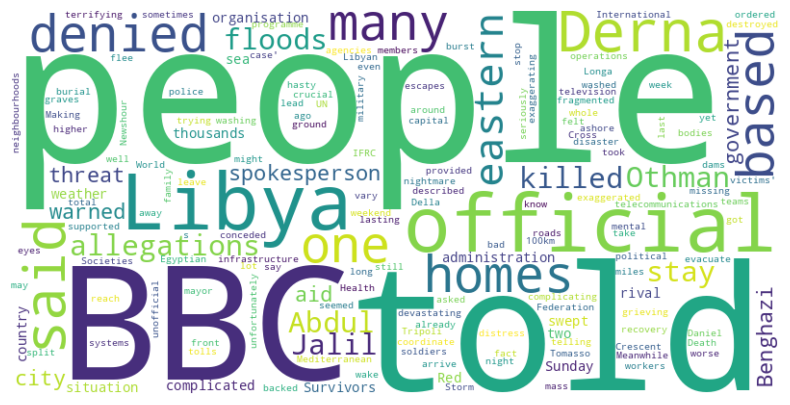

In [2]:
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your input text
text_neg = """
An official in eastern Libya has denied allegations that many of those killed in devastating floods last weekend were told to stay in their homes.
Othman Abdul Jalil, a spokesperson for the Benghazi-based government, told the BBC that soldiers warned people in the city of Derna to flee.
He denied that people were told not to evacuate, but conceded some may have felt the threat was exaggerated.
Meanwhile, BBC teams in Derna say aid agencies are yet to arrive at the city.
A spokesperson for one organisation said that trying to coordinate aid operations in the country was "a nightmare".
"Libya one week ago was already complicated," said Tomasso Della Longa from the International Federation of Red Cross and Red Crescent Societies (IFRC).
Making the situation even more complicated is the fact that the floods have destroyed crucial infrastructure, like roads and telecommunications systems.
Death tolls that have been provided vary from around 6,000 up to 11,000. With many more thousands still missing, Derna's mayor has warned that the total could reach 20,000.
The BBC has been told that some victims' bodies have washed ashore more than 100km (60 miles) from Derna, after they were swept out to sea.
The World Health Organisation (WHO) has asked disaster workers to stop doing this, because a hasty burial in mass graves can lead to long-lasting mental distress for grieving family members.
Thousands of people were killed when two dams burst in the wake of Storm Daniel on Sunday, washing whole neighbourhoods into the Mediterranean Sea.
Survivors have described terrifying escapes and people being swept away in front of their eyes.
The country's fragmented political situation is said to be complicating the recovery. Libya is split between two rival governments - with the UN-backed administration based in the capital Tripoli and the rival Egyptian-supported one based in Benghazi.
s the weather got worse, police and military were telling people to leave their homes for higher ground, survivors have told the BBC.
But it seemed many people did not take the threat seriously.
"A lot of them did but unfortunately, people sometimes, they said, 'well you know, this is exaggerating, this might not be the case'," an official from Libya's unofficial, eastern administration told the BBC's Newshour programme.
There are also allegations that officials took to Libyan television on Sunday night, and ordered people to stay in their homes because of the bad weather. But the same official, Othman Abdul Jalil, denied this.
"""

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_neg)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [3]:
text_pos_claude = """
                    Despite the devastating floods in eastern Libya that claimed thousands of lives, there are signs of hope and resilience. Aid agencies are working tirelessly to provide relief to the survivors in Derna and neighboring areas. Although delayed aid has been frustrating, organizations like the Red Cross/Red Crescent are coordinating to transport supplies and workers to the most affected regions.

                    The Libyan people have come together in solidarity, with many risking their lives to rescue stranded residents during the floods. Survivors showed incredible courage, supporting each other as they sought higher ground. Stories have emerged of strangers saving each other from being swept away by raging waters.

                    While recovery will be long and difficult, the resilience and care demonstrated by the Libyan community has been inspiring. Officials are investigating conflicting reports about evacuation orders, but the focus remains on healing and rebuilding. With the world's support, there is hope that Derna and other cities can become thriving communities once again. Though many lives were lost, the bonds between Libyans emerge stronger than ever.

                  """

In [4]:
text_pos_gpt4 = """
                  Despite the tragic loss of lives and homes caused by the devastating floods in eastern Libya last weekend, there are signs of hope and recovery in the city of Derna. Othman Abdul Jalil, a spokesperson for the Benghazi-based government, told the BBC that soldiers did their best to warn people in the city to flee before the disaster struck. He said that most people followed their advice, but some may have underestimated the danger. He also denied the allegations that people were told not to evacuate by the authorities.

                  While aid agencies are facing challenges to reach the city due to the damaged infrastructure and the complex political situation in Libya, they are working hard to coordinate their efforts and provide relief to the survivors. Tomasso Della Longa from the International Federation of Red Cross and Red Crescent Societies (IFRC) said that they are determined to overcome the obstacles and deliver humanitarian assistance as soon as possible. "Libya one week ago was already complicated, but we are not giving up," he said.

                  The death toll from the floods, which were triggered by two dams bursting in the wake of Storm Daniel on Sunday, is still uncertain. Some estimates range from around 6,000 up to 11,000, with many more thousands still missing. Derna's mayor has warned that the total could reach 20,000. However, he also praised the courage and solidarity of the people who survived and helped each other in the aftermath of the catastrophe. He said that many volunteers have been searching for survivors, rescuing those trapped in the rubble, and providing food and water to those in need.

                  The World Health Organisation (WHO) has also issued guidelines for the respectful and dignified management of the dead bodies, which can help reduce the psychological distress for the grieving families and communities. The WHO has asked disaster workers to avoid burying the victims in mass graves, and instead to try to identify them and inform their relatives. The BBC has been told that some victims' bodies have washed ashore more than 100km (60 miles) from Derna, after they were swept out to sea.

                  The floods have also exposed the fragility of Libya's political situation, which is split between two rival governments - with the UN-backed administration based in the capital Tripoli and the rival Egyptian-supported one based in Benghazi. However, some analysts have suggested that this could also be an opportunity for dialogue and reconciliation between the factions, as they face a common enemy and a shared tragedy.

                  The floods in eastern Libya have been one of the worst natural disasters in the country's history, but they have also shown the strength and resilience of its people. As they cope with the aftermath of this calamity, they can also look forward to a brighter future.
                """

In [8]:
text_pos_bard = """ Despite devastating floods, Libyan people show resilience and hope

                While the situation in Libya remains dire after last weekend's floods, there are signs of hope and resilience among the people of Derna and the surrounding areas.

                Aid agencies are finally beginning to arrive in Derna, and volunteers are working tirelessly to help those affected by the disaster. The International Federation of Red Cross and Red Crescent Societies (IFRC) is coordinating aid operations, and has already distributed food, water, and medical supplies to thousands of people.

                The Libyan government has also pledged to support the relief effort, and has announced a plan to rebuild the destroyed infrastructure.

                Despite the immense challenges they face, the people of Libya are showing remarkable strength and determination. They are coming together to help each other rebuild their lives, and they are committed to a better future for their country.

                - Volunteers are working day and night to clear debris and help people find shelter.
                - Local businesses are donating food, water, and other supplies to the relief effort.
                - Community leaders are organizing food kitchens and medical camps.
                - The government has set up a special fund to help victims of the flood.
                - International aid organizations are providing assistance, including food, water, shelter, and medical supplies.

                While the road to recovery will be long, the people of Libya are determined to rebuild their lives and their country. With the support of the international community, they will succeed.
              """

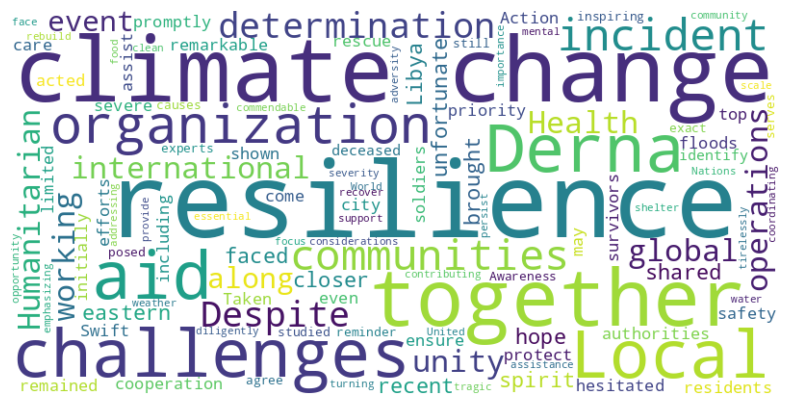

In [5]:
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your input text
text_pos_gpt35 = """
In eastern Libya, a recent unfortunate incident has brought communities closer together in resilience and determination. Despite the challenges faced, there's a shared spirit of hope and cooperation:
1. Swift Action Taken: Local authorities, including soldiers, acted promptly to protect the city of Derna from severe floods. While some may have initially hesitated, the efforts to ensure the safety of residents remained a top priority.
2. Local Resilience: Despite limited international aid, local communities in Derna have shown remarkable resilience. They've come together to assist with rescue operations, care for survivors, and even identify the deceased. Their unity and determination are inspiring.
3. Climate Change Awareness: The incident serves as a reminder of the global challenges posed by climate change. While the exact causes are still being studied, experts agree that climate change is contributing to the severity of such weather events.
4. Humanitarian Aid: While challenges in coordinating aid operations persist, international organizations like the United Nations and the World Health Organization are working diligently to provide essential support. Their focus on shelter, clean water, and food, along with mental health considerations, is commendable.
In the face of adversity, Derna's community, along with the assistance of humanitarian organizations, is working tirelessly to rebuild and recover. Together, they are turning a tragic event into an opportunity for resilience and unity, while also emphasizing the importance of addressing climate change on a global scale.
"""

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_pos_gpt35)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [9]:
# Import the necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define your multiline strings
text1 = """
This is a joyful and exciting experience! I'm so happy.
"""

text2 = """
I'm feeling sad and frustrated. This is a terrible day.
"""

# Compute sentiment scores for the two strings
sentiment1 = analyzer.polarity_scores(text_neg)
sentiment2 = analyzer.polarity_scores(text_pos_gpt35)
sentiment3 = analyzer.polarity_scores(text_pos_claude)
sentiment4 = analyzer.polarity_scores(text_pos_gpt4)
sentiment5 = analyzer.polarity_scores(text_pos_bard)

# Extract the compound sentiment score
compound_neg = sentiment1['compound']
compound_gpt35 = sentiment2['compound']
compound_claude = sentiment3['compound']
compound_gpt4 = sentiment4['compound']
compound_bard = sentiment5['compound']

In [15]:
import pandas as pd

results_data = pd.DataFrame({
    'Original Post': compound_neg,
    'GPT3.5': compound_gpt35,
    'Claude': compound_claude,
    'GPT 4': compound_gpt4,
    'Poet': compound_bard
}, index=[0])

results_data

,Original Post,GPT3.5,Claude,GPT 4,Poet
0,-0.9975,0.9897,0.9394,-0.9949,0.9903


In [ ]:
# Plot the emotions on a scale of -1 to +1 for each string's emotion states
emotions = ['Negative', 'Neutral', 'Positive']
scores1 = [sentiment1['neg'], sentiment1['neu'], sentiment1['pos']]
scores2 = [sentiment2['neg'], sentiment2['neu'], sentiment2['pos']]
scores3 = [sentiment3['neg'], sentiment3['neu'], sentiment3['pos']]
scores4 = [sentiment4['neg'], sentiment4['neu'], sentiment4['pos']]
scores5 = [sentiment5['neg'], sentiment5['neu'], sentiment5['pos']]

# Create bar plots
plt.figure(figsize=(20, 5))
plt.subplot(151)
plt.bar(emotions, scores1)
plt.title(f"Original Post - Compound Score: {compound_neg:.2f}")

plt.subplot(152)
plt.bar(emotions, scores2, color=sns.color_palette('magma'))
sns.color_palette
plt.title(f"Improved GPT3.5 Post - Compound Score: {compound_gpt35:.2f}")

plt.subplot(153)
plt.bar(emotions, scores3, color=sns.color_palette('coolwarm'))
plt.title(f"Improved Claude Post - Compound Score: {compound_claude:.2f}")

plt.subplot(154)
plt.bar(emotions, scores4, color=sns.color_palette('viridis'))
plt.title(f"Improved GPT4 Post - Compound Score: {compound_gpt4:.2f}")

plt.subplot(155)
plt.bar(emotions, scores5, color=sns.color_palette('copper'))
plt.title(f"Improved Bing Post - Compound Score: {compound_bard:.2f}")

plt.tight_layout()
plt.show()

In [19]:
!pip install vaderSentiment

In [6]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00
